In [17]:
import numpy
import numpy as np
from PIL import Image
from matplotlib import cm, pyplot
from matplotlib.pyplot import figure


def Compress(img, ComponentCount):
    """This function uses a singular value decomposition to compress an image.
    \param Image An quadratic array providing the image. Entries provide the
           brightness of indidividual pixels, rows correspond to scanlines.
    \param ComponentCount The number of singular values to be maintained in the
           compressed representation.
    \return A tuple (U,SingularValues,V,CompressionRatio) such that U*Sigma*V^*
            provides an approximation to the original image when Sigma is a
            diagonal matrix with SingularValues on its main diagonal.
            CompressionRatio should provide the quotient of the number of scalars
            in Image and the number of scalars in the returned representation of
            Image."""
    m, n = img.shape

    compU = np.zeros((m, ComponentCount))
    compV = np.zeros((ComponentCount, n))
    compS = np.zeros((ComponentCount, ComponentCount))

    U, S, V = np.linalg.svd(img)

    for i in range(ComponentCount):

        compS[i, i] = S[i]

        for j in range(n):
            compV[i, j] = V[i, j]

        for j in range(m):
            compU[j, i] = U[j, i]



    return compU, compS, compV, ComponentCount/256


def Decompress(U, SingularValues, V):
    """Given a compressed representation of an image as produced by Compress() this
    function reconstructs the original image approximately and returns it."""
    return np.dot(U, np.dot(SingularValues, V))

Lena

Stoff

Stoff2



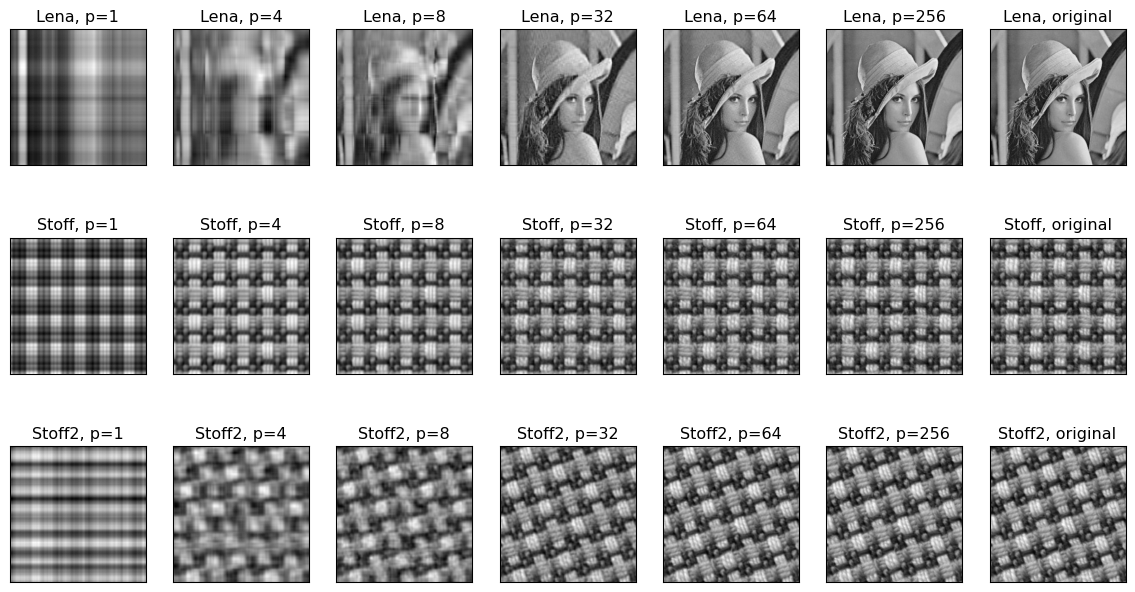

In [18]:
# Define the task
ImageFileNameList = ["Lena", "Stoff", "Stoff2"]
ComponentCountList = [1, 4, 8, 32, 64, 256]
# Iterate over all tasks and generate one large plot
PlotIndex = 1
figure(figsize=(15, 8), dpi=96)
for ImageFileName in ImageFileNameList:
    print(ImageFileName)
    ImagePath = ImageFileName + ".png"
    img = Image.open(ImagePath)

    # Convert to numpy array
    imgmat = np.array(list(img.getdata(band=0)), float)
    # Reshape according to orginal image dimensions
    imgmat.shape = (img.size[1], img.size[0])
    imgmat = np.matrix(imgmat)

    # Compressed Images
    for ComponentCount in ComponentCountList:
        # Define a subplot for this decompressed image
        Axes = pyplot.subplot(
            len(ImageFileNameList), len(ComponentCountList) + 1, PlotIndex
        )
        Axes.set_xticks([])
        Axes.set_yticks([])
        Axes.set_title(ImageFileName + ", p=" + str(ComponentCount))
        PlotIndex += 1

        # Apply compression
        U, SingularValues, V, CompressionRatio = Compress(imgmat, ComponentCount)
        # Apply decompression
        DecompressedImage = Decompress(U, SingularValues, V)

        # Show the result
        pyplot.imshow(DecompressedImage, cmap=cm.gray)

    # Original Image
    Axes = pyplot.subplot(
        len(ImageFileNameList), len(ComponentCountList) + 1, PlotIndex
    )
    Axes.set_xticks([])
    Axes.set_yticks([])
    Axes.set_title(ImageFileName + ", original")
    pyplot.imshow(imgmat, cmap=cm.gray)
    PlotIndex += 1

    print("")
pyplot.show()

In [19]:
# Bonus Exercise: Store a compressed image as NPZ file

# Define the task
ImageFileNameList = ["Lena", "Stoff", "Stoff2"]
ComponentCountList = [1, 4, 8, 32, 64]
# Iterate over all tasks and generate one large plot
for ImageFileName in ImageFileNameList:

    ImagePath = ImageFileName + ".png"
    img = Image.open(ImagePath)

    # Convert to numpy array
    imgmat = np.array(list(img.getdata(band=0)), float)
    # Reshape according to orginal image dimensions
    imgmat.shape = (img.size[1], img.size[0])
    imgmat = np.matrix(imgmat)

    # Compressed Images
    for ComponentCount in ComponentCountList:
        # Apply compression
        U, SingularValues, V, CompressionRatio = Compress(imgmat, ComponentCount)
        # Apply decompression
        np.savez(f'data/{ImageFileName}_{str(ComponentCount)}.npz', U, SingularValues, V)


Lena
Compression ratio for p=1 is 0.25:1.
Compression ratio for p=4 is 0.25:1.
Compression ratio for p=8 is 0.25:1.
Compression ratio for p=32 is 0.25:1.
Compression ratio for p=64 is 0.25:1.

Stoff
Compression ratio for p=1 is 0.25:1.
Compression ratio for p=4 is 0.25:1.
Compression ratio for p=8 is 0.25:1.
Compression ratio for p=32 is 0.25:1.
Compression ratio for p=64 is 0.25:1.

Stoff2
Compression ratio for p=1 is 0.25:1.
Compression ratio for p=4 is 0.25:1.
Compression ratio for p=8 is 0.25:1.
Compression ratio for p=32 is 0.25:1.
Compression ratio for p=64 is 0.25:1.



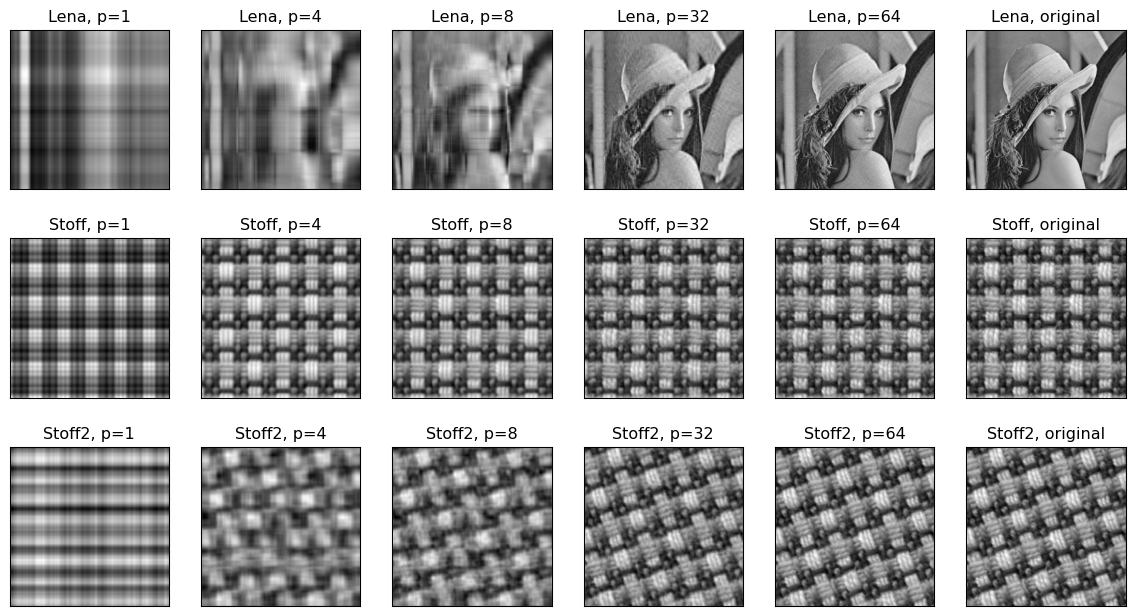

In [20]:
# Define the task
ImageFileNameList = ["Lena", "Stoff", "Stoff2"]
ComponentCountList = [1, 4, 8, 32, 64]
# Iterate over all tasks and generate one large plot
PlotIndex = 1
figure(figsize=(15, 8), dpi=96)
for ImageFileName in ImageFileNameList:
    print(ImageFileName)
    ImagePath = ImageFileName + ".png"
    img = Image.open(ImagePath)

    # Convert to numpy array
    imgmat = np.array(list(img.getdata(band=0)), float)
    # Reshape according to orginal image dimensions
    imgmat.shape = (img.size[1], img.size[0])
    imgmat = np.matrix(imgmat)

    # Compressed Images
    for ComponentCount in ComponentCountList:
        # Define a subplot for this decompressed image
        Axes = pyplot.subplot(
            len(ImageFileNameList), len(ComponentCountList) + 1, PlotIndex
        )
        Axes.set_xticks([])
        Axes.set_yticks([])
        Axes.set_title(ImageFileName + ", p=" + str(ComponentCount))
        PlotIndex += 1

        file = np.load(f'data/{ImageFileName}_{str(ComponentCount)}.npz')

        # Apply decompression
        DecompressedImage = Decompress(file['arr_0'], file['arr_1'], file['arr_2'])

        # Show the result
        pyplot.imshow(DecompressedImage, cmap=cm.gray)
        # Compute and print the compression ratio
        print(
            "Compression ratio for p="
            + str(ComponentCount)
            + " is "
            + str(CompressionRatio)
            + ":1."
        )

    # Original Image
    Axes = pyplot.subplot(
        len(ImageFileNameList), len(ComponentCountList) + 1, PlotIndex
    )
    Axes.set_xticks([])
    Axes.set_yticks([])
    Axes.set_title(ImageFileName + ", original")
    pyplot.imshow(imgmat, cmap=cm.gray)
    PlotIndex += 1

    print("")
pyplot.show()

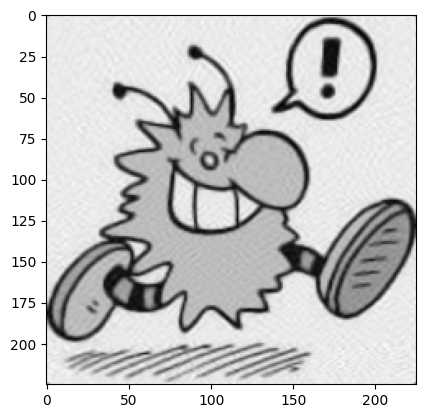

In [21]:

file = np.load(f'data/Mystery.npz')

s = np.diag(file['S']) # Hätte mal auf dem Blatt stehen können, dass es nur ein Vektor ist und nicht eine Matrix

DecompressedImage = np.dot(file['U'], np.dot(s, file['V'].T)) # V war auch nicht transponiert. Wieso muss man immer uns das Leben schwer machen?

pyplot.imshow(DecompressedImage, cmap=cm.gray)
pyplot.show()
